6. Which country has produced the most successful tennis players? 


In [1]:
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parent
proc_dir = project_root / "data" / "processed"
raw_dir = project_root / "data" / "raw"
out_dir = project_root / "reports" / "answers"
out_dir.mkdir(parents=True, exist_ok=True)

matches_file = proc_dir / "match_results_with_winner.parquet"
players_file = raw_dir / "players.parquet"

matches = pd.read_parquet(matches_file)
players = pd.read_parquet(players_file)

matches["winner_player_id"] = matches.apply(
    lambda row: row["home_player_id"] if row["winner_code"] == 1 else (
                row["away_player_id"] if row["winner_code"] == 2 else None),
    axis=1
)

matches = matches.dropna(subset=["winner_player_id"])

winners_with_country = matches.merge(
    players[["player_id", "country"]],
    left_on="winner_player_id",
    right_on="player_id",
    how="left"
)

country_win_counts = (
    winners_with_country
    .groupby("country")
    .size()
    .reset_index(name="wins")
    .sort_values(by="wins", ascending=False)
    .reset_index(drop=True)
)

country_win_counts.index = country_win_counts.index + 1
country_win_counts.index.name = "Rank"

output_path = out_dir / "q6_country_wins.csv"
country_win_counts.to_csv(output_path, index=True, encoding="utf-8-sig")

print(country_win_counts.head(10))
print(f"Saved to {output_path}")


             country  wins
Rank                      
1             France  1073
2              Italy   996
3                USA   944
4             Russia   671
5            Germany   563
6          Argentina   561
7              Japan   529
8              Spain   526
9          Australia   447
10    United Kingdom   379
Saved to c:\Users\mit\Desktop\Finaaal\reports\answers\q6_country_wins.csv


پر کردن ستون های خالی تا حد بیشتری ممکن بود اما تاحد ممکن از برد های تقریبی و تخمینی جلوگیری شد

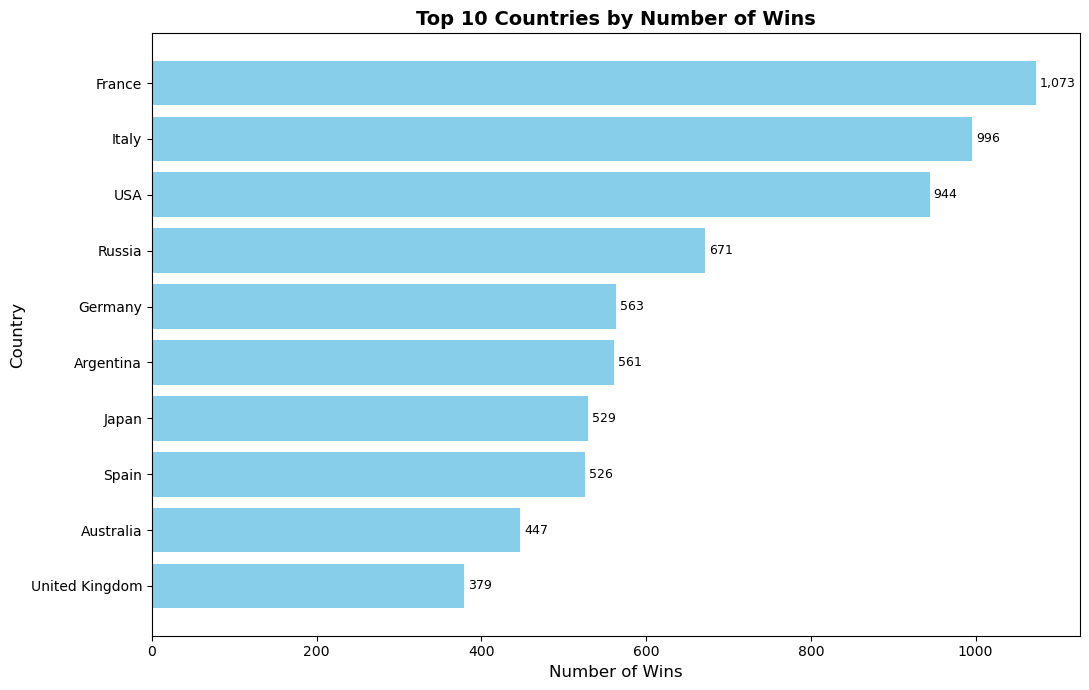

Figure saved to c:\Users\mit\Desktop\Finaaal\reports\figures\q6_top_countries_wins.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parent
proc_dir = project_root / "data" / "processed"
raw_dir = project_root / "data" / "raw"
fig_dir = project_root / "reports" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

matches_file = proc_dir / "match_results_with_winner.parquet"
players_file = raw_dir / "players.parquet"

matches = pd.read_parquet(matches_file)
players = pd.read_parquet(players_file)

matches["winner_player_id"] = matches.apply(
    lambda row: row["home_player_id"] if row["winner_code"] == 1 else (
                row["away_player_id"] if row["winner_code"] == 2 else None),
    axis=1
)
matches = matches.dropna(subset=["winner_player_id"])

winners_with_country = matches.merge(
    players[["player_id", "country"]],
    left_on="winner_player_id",
    right_on="player_id",
    how="left"
)

country_win_counts = (
    winners_with_country
    .groupby("country")
    .size()
    .reset_index(name="wins")
    .sort_values(by="wins", ascending=False)
    .reset_index(drop=True)
)

top10 = country_win_counts.head(10)

plt.figure(figsize=(11, 7))
bars = plt.barh(top10["country"], top10["wins"], color="skyblue")
plt.xlabel("Number of Wins", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("Top 10 Countries by Number of Wins", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{width:,}", va='center', fontsize=9)

plt.tight_layout()

output_path = fig_dir / "q6_top_countries_wins.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Figure saved to {output_path}")
